In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv("/content/sample_data/PCA_Dataset_Iris_Flowers.csv")
df.head()

,sepal length,sepal width,petal length,petal width,species
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


In [3]:
# now we need to have x and y
x = df.drop("species",axis = 1)
y = df["species"]

In [4]:
x

,sepal length,sepal width,petal length,petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [5]:
y

0      1
1      1
2      1
3      1
4      1
      ..
145    3
146    3
147    3
148    3
149    3
Name: species, Length: 150, dtype: int64

In [6]:
# now we need to preprocessing of the data to scale x
from sklearn.preprocessing import StandardScaler
x_scaled = StandardScaler().fit_transform(x)
x_scaled

array([[-9.00681170e-01,  1.01900435e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00, -1.31979479e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.38535265e+00,  3.28414053e-01, -1.39706395e+00,
        -1.31544430e+00],
       [-1.50652052e+00,  9.82172869e-02, -1.28338910e+00,
        -1.31544430e+00],
       [-1.02184904e+00,  1.24920112e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-5.37177559e-01,  1.93979142e+00, -1.16971425e+00,
        -1.05217993e+00],
       [-1.50652052e+00,  7.88807586e-01, -1.34022653e+00,
        -1.18381211e+00],
       [-1.02184904e+00,  7.88807586e-01, -1.28338910e+00,
        -1.31544430e+00],
       [-1.74885626e+00, -3.62176246e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00,  9.82172869e-02, -1.28338910e+00,
        -1.44707648e+00],
       [-5.37177559e-01,  1.47939788e+00, -1.28338910e+00,
        -1.31544430e+00],
       [-1.26418478e+00,  7.88807586e-01, -1.22655167e+00,
      

In [7]:
# now we need feature -> which will be transpose of the x_scaled
features = x_scaled.transpose()
# we need cov_matrix of features
cov_mat = np.cov(features)
cov_mat

array([[ 1.00671141, -0.11835884,  0.87760447,  0.82343066],
       [-0.11835884,  1.00671141, -0.43131554, -0.36858315],
       [ 0.87760447, -0.43131554,  1.00671141,  0.96932762],
       [ 0.82343066, -0.36858315,  0.96932762,  1.00671141]])

In [8]:
# now we need to have values and vectors 
values,vectors = np.linalg.eig(cov_mat)
print(values)
print(vectors)

[2.93808505 0.9201649  0.14774182 0.02085386]
[[ 0.52106591 -0.37741762 -0.71956635  0.26128628]
 [-0.26934744 -0.92329566  0.24438178 -0.12350962]
 [ 0.5804131  -0.02449161  0.14212637 -0.80144925]
 [ 0.56485654 -0.06694199  0.63427274  0.52359713]]


In [9]:
# explained varaince
explained_variance = []
for i in range(len(values)):
  explained_variance.append((values[i])/np.sum(values)*100)


In [10]:
explained_variance

[72.9624454132999, 22.850761786701725, 3.668921889282867, 0.5178709107155016]

<BarContainer object of 4 artists>

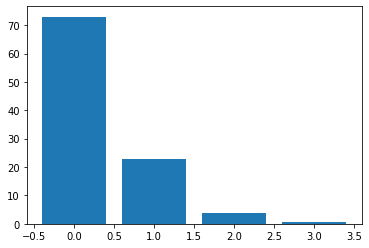

In [11]:
# we need to plot the explained_varaince
import matplotlib.pyplot as plt
plt.bar(range(4),explained_variance)

In [12]:
# Now for the 2 principle components
projected_1 = x_scaled.dot(vectors.transpose()[0])
projected_2 = x_scaled.dot(vectors.transpose()[1])

# make a result Dataframe for the seaborn
res = pd.DataFrame()
res["PC1"] = projected_1
res["PC2"] = projected_2
res["Y"] = y

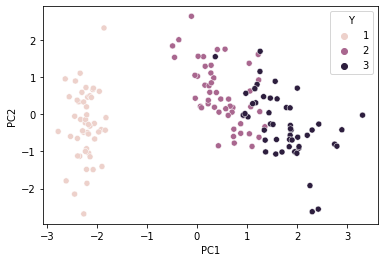

In [14]:
# now we need to plot via the seaborn
import seaborn as sns
sns.scatterplot(x="PC1",y="PC2",hue="Y",data=res)